In [1]:
# Connect google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Load the best model
import pickle
with open("/content/drive/Shareddrives/1:1 Srinithi Rajan/Model/rf_model_30sec.pkl", "rb") as file:
    rf_loaded = pickle.load(file)

In [3]:
# Load the test data
import pandas as pd
test_data = pd.read_csv('/content/drive/Shareddrives/1:1 Srinithi Rajan/Dataset/Data/CSV files/test_scaled_30_sec.csv')

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
# Create the classification report and a confusion matrix
y_pred = rf_loaded.predict(test_data.drop(['label'], axis=1))
y_truth = test_data['label']

# Classification report
print(classification_report(y_truth, y_pred))

              precision    recall  f1-score   support

       blues       0.94      0.92      0.93       422
   classical       0.96      0.98      0.97       410
     country       0.84      0.95      0.89       369
       disco       0.95      0.96      0.95       416
      hiphop       0.96      0.92      0.94       377
        jazz       0.94      0.93      0.94       405
       metal       0.98      0.97      0.98       424
         pop       0.97      0.98      0.98       364
      reggae       0.95      0.96      0.95       428
        rock       0.92      0.84      0.88       381

    accuracy                           0.94      3996
   macro avg       0.94      0.94      0.94      3996
weighted avg       0.94      0.94      0.94      3996



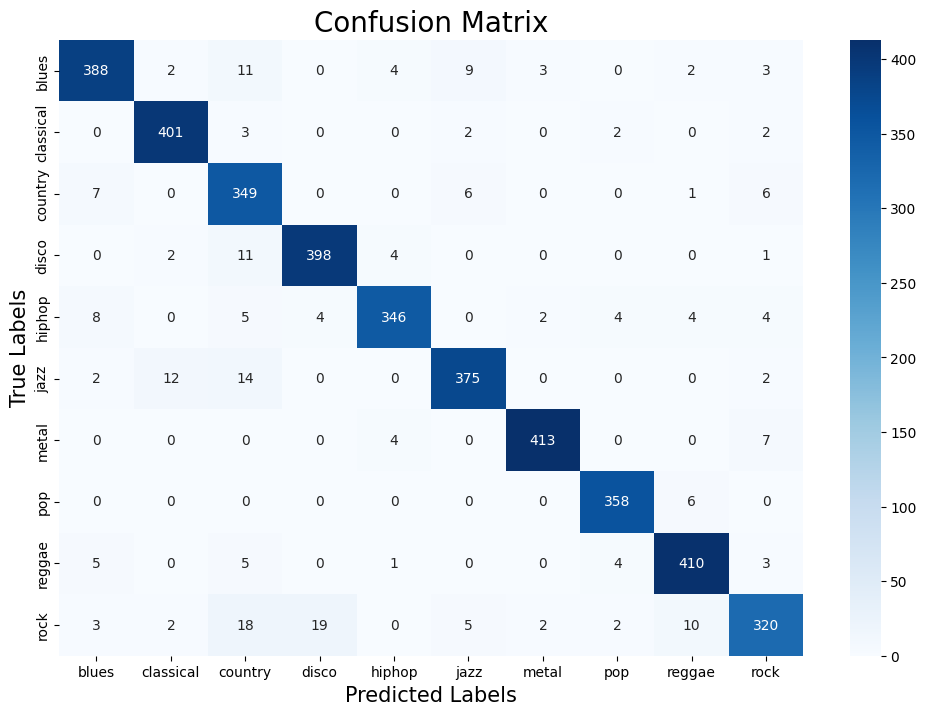

In [5]:
# Create the confusion matrix (font size flexibility)
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_truth and y_pred are your true labels and predictions respectively
# Generate the confusion matrix
cm = confusion_matrix(y_truth, y_pred, labels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"])

# Plotting the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"], yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"])
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=15)
plt.ylabel('True Labels', size=15)
plt.show()